# EXOPLANETS


# INTRODUCTION

<h5>
Exploring space and discovering other world's has been a grand quest for quite some time now. One that was rejuvenated by the Kepler Mission. The objective of the Kepler Mission is to survey the structure and diversity of planetary systems, in hopes of discovering Earth-like planets. In doing so the Kepler telescope collects information on planetary systems such as planet size, radii, mass, size of the star, temperature of the star, all to determine whether it is a habitable planet. This project aims to perform a similar task. However, this team does not have nearly the funds to send a telescope into space like NASA does, so a different and low budget method was applied. This project uses two machine learning algorithm, logistic regression and MLP classifier to confirm whether an object of interest found by the Kepler telescope is indeed a planet. The target variable is the 'soltype' which gives the Kepler disposition, whether or no the object of interest was confirmed to be a planet or just a candidate.




## DATA OVERVIEW

<h5>
Outlined below is a brief summary of critical missions, instruments, telescopes, or methods utilized to collect primary planetary observations which comprise CalTech's open-source Exoplanet Archive:

## MISSION DATA
### IMAGING DATA - TRANSIT / EMISSION / MAPPING
* Kepler (2009-2018)
  * First space mission to search for Earth-sized or smaller planets within the habitable zones of nearby stars in Earth's galaxy.
* K2 (2018-Present)
  * Continuation of Kepler's exoplanet discoveries and an expansion into new and exciting astrophysical observations.
* TESS (2018-Present)
  * Transiting Exoplanet Survey Satellite
  * Surveying the sky to find transiting exoplanets around the brightest stars near Earth.
* James Webb Space Telescope (2021-Present)
  * Advanced instrument capabilities will allow for enhanced imaging and mapping of the visible universe

### SPECTROGRAPHY DATA - TRANSIT / EMISSION
* Hubble Space Telescope [NASA]
  * Wide-Field Camera
* Spitzer Space Telescope [NASA]
  * Infrared Array Camera (IRAC)
  * Infrared Spectrograph (IRS)
* Hale Telescope [CalTech]
  * Wide-Field Infrared Camera (WIRC)
* CARMENES - Calar Alto high-Resolution search for M dwarfs with Exoearths with Near-infrared and optical Echelle Spectrographs
* HADES - HArps-n red Dwarf Exoplanet Survey

### DIRECT IMAGING
* NRM, NACO, NICS, IRCS, SPHERE, SIMON

### MICRO-LENSING
* Various Telescopic Instruments

### PLANNED MISSIONS:
* Nancy Grace Roman Space Telescope [2027]
* ARIEL - European Space Agency [2029]

### SOURCES / REFERENCES
Primary sourcing for data as presented and modeled within analysis as follows:
* CalTech Exoplanet Archive:
  * Archive Index: https://exoplanetarchive.ipac.caltech.edu/index.html
  * Archive Statistics: https://exoplanetarchive.ipac.caltech.edu/docs/counts_detail.html
  * Archive Data: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative
  * Archive Data: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS
  

# CONFIGURATION

## LIBRARY IMPORT

In [1]:
# LIBRARY IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as stats
import statistics

import requests
from bs4 import BeautifulSoup
import json
import time
import nltk
import re
import datetime

%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA

from google.colab import drive
import sys

#import plotly as ply
#import plotly.express as px

print("\nIMPORT SUCCESS")


IMPORT SUCCESS


In [2]:
# Mount Google Drive
drive.mount('drive')
#drive.mount('/content/drive')

# Absolute path of current folder
abspath_curr = '/content/drive/My Drive/GWU/ML-EXOPLANETS/'

Mounted at drive


In [ ]:
# RANDOM SEED
random_seed = 42

# RANDOM SEED - TensorFlow
tf.random.set_seed(random_seed)

# RANDOM SEED - NumPy
np.random.seed(random_seed)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## DATA IMPORT

In [4]:
planetary_systems = 'drive/My Drive/GWU/ML-EXOPLANETS/data/NASA_Planetary_Systems-4-24-22'
exoplanets = 'drive/My Drive/GWU/ML-EXOPLANETS/data/NASA_Exoplanets-4-22-22'

planetary_systems = pd.read_excel(planetary_systems + '.xlsx', sheet_name="PLANETARY SYSTEMS")
#planetary_systems = pd.read_csv(planetary_systems + '.csv', index_col='pl_name')

exoplanets = pd.read_excel(exoplanets + '.xlsx', sheet_name="EXOPLANETS")
#exoplanets = pd.read_csv(exoplanets + '.csv', index_col='pl_name') 

# PRE-PROCESSING

In [ ]:
print(planetary_systems.info())
print('*'*50)
print(exoplanets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32329 entries, 0 to 32328
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        32329 non-null  int64  
 1   pl_name          32329 non-null  object 
 2   hostname         32329 non-null  object 
 3   default_flag     32329 non-null  int64  
 4   sy_snum          32329 non-null  int64  
 5   sy_pnum          32329 non-null  int64  
 6   pl_controv_flag  32329 non-null  int64  
 7   discoverymethod  32329 non-null  object 
 8   disc_year        32329 non-null  int64  
 9   disc_locale      32329 non-null  object 
 10  disc_facility    32329 non-null  object 
 11  disc_telescope   32329 non-null  object 
 12  disc_instrument  32329 non-null  object 
 13  soltype          32329 non-null  object 
 14  pl_orbper        29521 non-null  float64
 15  pl_orbsmax       18141 non-null  float64
 16  pl_rade          22688 non-null  float64
 17  pl_radj     

## OUTLIERS
  * Detection, filtering, and ejection of outlier values within data sets
  * High sensitivity towards avoiding overly stringent filters to preserve initial scope of data; cannot freely omit official observations

In [ ]:
## OUTLIER DETECTION / FILTERING / NULL VALUES
  # Adjusting filters in respect to trial + error boxplots (below)

## OUTLIER THRESHOLDS

# Filtering out data where host star radius exceeds 35x the radius of Earth's Sun
planetary_systems = planetary_systems[planetary_systems['st_rad'] <= 35] #60 #35

# Filtering out data where host star mass exceeds 10x the mass of Earth's Sun
planetary_systems = planetary_systems[planetary_systems['st_mass'] <= 20] #10

# Filtering out data where host star temperature exceeds 25,000K
planetary_systems = planetary_systems[planetary_systems['st_teff'] <= 25000] #32999


## NOT IN USE - OVERLY PUNITIVE FILTERS DUE TO GAPS IN DATA

# Filtering out data where host star age exceeds 10BYA
  # planetary_systems = planetary_systems[planetary_systems['st_age'] <= 10] #32999

# Filtering out data where planet observation period exceeds 3 (__)
  # planetary_systems = planetary_systems[planetary_systems['pl_orbper'] <= 3]

In [ ]:
print(planetary_systems.info())
print('*'*50)
print(exoplanets.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26410 entries, 0 to 32328
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        26410 non-null  int64  
 1   pl_name          26410 non-null  object 
 2   hostname         26410 non-null  object 
 3   default_flag     26410 non-null  int64  
 4   sy_snum          26410 non-null  int64  
 5   sy_pnum          26410 non-null  int64  
 6   pl_controv_flag  26410 non-null  int64  
 7   discoverymethod  26410 non-null  object 
 8   disc_year        26410 non-null  int64  
 9   disc_locale      26410 non-null  object 
 10  disc_facility    26410 non-null  object 
 11  disc_telescope   26410 non-null  object 
 12  disc_instrument  26410 non-null  object 
 13  soltype          26410 non-null  object 
 14  pl_orbper        26245 non-null  float64
 15  pl_orbsmax       16229 non-null  float64
 16  pl_rade          18571 non-null  float64
 17  pl_radj     

## VARIABLE ASSIGNMENT

In [ ]:
# VARIABLE CODES:
  # st = Star
  # pl = Planet
  # sy = System (st + pl)

# st_logg = log10(cm/sec**2) = surface gravity
# st_metallicity = Iron / Hydrogen = Fe / H

# ra = Right Ascension
# dec = Declination

# glon = galactic longitude
# glat = galactic latitude

# Parsec (PC) - unit of length used to measure the large distances to astronomical objects outside the Solar System
  # Approximately equal to:
    # 3.26 light-years
    # 206,000 astronomical units
    # 30.9 trillion kilometres


# Other variables to consider:
  # planet equilibrium temperature - deleted column?
  # stellar age??
  # stellar density ??
  # Number of Moons (may have many NA values)
  # galactic latitude / longitude

In [ ]:
print(planetary_systems.columns)
print('*'*100)
print(exoplanets.columns)

Index(['loc_rowid', 'pl_name', 'hostname', 'default_flag', 'sy_snum',
       'sy_pnum', 'pl_controv_flag', 'discoverymethod', 'disc_year',
       'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
       'soltype', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse',
       'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl',
       'ttv_flag', 'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met',
       'st_lum', 'st_logg', 'st_age', 'ra', 'dec', 'glat', 'glon', 'sy_dist',
       'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')
****************************************************************************************************
Index(['loc_rowid', 'pl_name', 'host_name', 'sy_star_count', 'sy_planet_count',
       'disc_method', 'disc_year', 'disc_facility', 'disc_telescope',
       'disc_instrument', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_bmassprov',
       'pl_orbeccen'

In [ ]:
## PLANETARY SYSTEMS VARIABLES

psystem_all = planetary_systems[['loc_rowid', 'pl_name', 'hostname', 'default_flag', 'sy_snum',
                      'sy_pnum', 'pl_controv_flag', 'discoverymethod', 'disc_year',
                      'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
                      'soltype', 'pl_orbper', 'pl_orbsmax','pl_orbincl',# 'pl_insol', 'pl_eqt', 
                      #'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 
                      #'ttv_flag', 'st_spectype',  
                      'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_age', #'st_lum', 
                      'ra', 'dec', 'glat', 'glon', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'
                      ]]

psystem_nums = planetary_systems[['loc_rowid', 'pl_name', 'default_flag',
                                  'sy_snum', 'sy_pnum', 'sy_dist',
                                  'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_age', #'st_lum', 
                                  'pl_orbper', 'pl_orbsmax', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_controv_flag', #'pl_rade',
                                  'ra', 'dec', 'glat', 'glon', 
                                  'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'
                                  ]]

psystem_categorical = planetary_systems[['loc_rowid', 'pl_name', 'default_flag', #'host_name',
                                         'discoverymethod', 'disc_year', 'disc_facility', 'disc_telescope', 'disc_instrument', #'disc_method', 
                                         'pl_controv_flag',
                                         #'ra', 'dec', 'glat', 'glon', 
                                          'ra', 'dec', 'glat', 'glon', 
                                         'st_age',
                                          'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag',
                                         ]]

In [ ]:
## INDEX RE-CASTING / COLUMN DROP
psystem_all.index = psystem_all['loc_rowid'] #, inplace=True
psystem_all.drop(columns=['loc_rowid'], inplace=True) #, 'pl_name',
psystem_nums.index = psystem_nums['loc_rowid'] #, inplace=True
psystem_nums.drop(columns=['loc_rowid'], inplace=True) #, 'pl_name',
psystem_categorical.index = psystem_categorical['loc_rowid'] #, inplace=True
psystem_categorical.drop(columns=['loc_rowid'], inplace=True) #, 'pl_name',

#exo_data.index = exo_data['pl_name'] #, inplace=True
#exo_data.drop(columns='pl_name', inplace=True)

## FILTERING NA VALUES - only necessary for numerical model data (for now)
  #psystem_nums.dropna(inplace=True)
  #psystem_all.dropna(inplace=True)
  #psystem_categorical.dropna(inplace=True)

print(psystem_all.info())
print('*'*50)
print(psystem_nums.info())
print('*'*50)
print(psystem_categorical.info())
#print(exo_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26410 entries, 1 to 32329
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          26410 non-null  object 
 1   hostname         26410 non-null  object 
 2   default_flag     26410 non-null  int64  
 3   sy_snum          26410 non-null  int64  
 4   sy_pnum          26410 non-null  int64  
 5   pl_controv_flag  26410 non-null  int64  
 6   discoverymethod  26410 non-null  object 
 7   disc_year        26410 non-null  int64  
 8   disc_locale      26410 non-null  object 
 9   disc_facility    26410 non-null  object 
 10  disc_telescope   26410 non-null  object 
 11  disc_instrument  26410 non-null  object 
 12  soltype          26410 non-null  object 
 13  pl_orbper        26245 non-null  float64
 14  pl_orbsmax       16229 non-null  float64
 15  pl_orbincl       14988 non-null  float64
 16  st_teff          26410 non-null  float64
 17  st_rad      

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#psystem_all['pl_name'].value_counts().sort_values(ascending=False)

#print(psystem_all['pl_name'].describe())
#print('*'*50)
#print(psystem_all['default_flag'].value_counts())
#psystem_default = psystem_data[psystem_data['default_flag'] == 1]

#print(psystem_all['pl_orbper'].describe())

count    2.624500e+04
mean     1.571181e+04
std      2.481928e+06
min      1.797150e-01
25%      4.662723e+00
50%      1.086438e+01
75%      2.684763e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64


# DATA VIZ

In [ ]:
print(psystem_all.columns)
print('*'*50)
print(psystem_nums.columns)
print('*'*50)
print(psystem_categorical.columns)

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'pl_controv_flag', 'discoverymethod', 'disc_year', 'disc_locale',
       'disc_facility', 'disc_telescope', 'disc_instrument', 'soltype',
       'pl_orbper', 'pl_orbsmax', 'pl_orbincl', 'st_teff', 'st_rad', 'st_mass',
       'st_met', 'st_logg', 'st_age', 'ra', 'dec', 'glat', 'glon', 'sy_dist',
       'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')
**************************************************
Index(['pl_name', 'default_flag', 'sy_snum', 'sy_pnum', 'sy_dist', 'st_teff',
       'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_age', 'pl_orbper',
       'pl_orbsmax', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_controv_flag',
       'ra', 'dec', 'glat', 'glon', 'sy_dist', 'sy_vmag', 'sy_kmag',
       'sy_gaiamag'],
      dtype='object')
**************************************************
Index(['pl_name', 'default_flag', 'discoverymethod', 'disc_year',
       'disc_facility', 'disc_telescope', 'disc_instrume

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


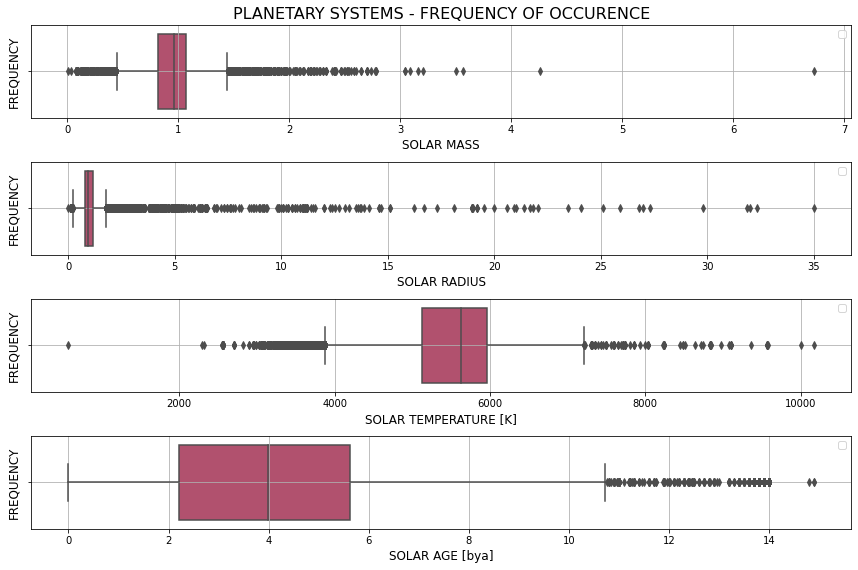

In [ ]:
## PLANETARY SYSTEMS - Observational frequency within data set, by Solar features
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.boxplot(psystem_all['st_mass'], palette='flare')
plt.title('PLANETARY SYSTEMS - FREQUENCY OF OCCURENCE', fontsize=16)
plt.xlabel('SOLAR MASS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(412)
sns.boxplot(psystem_all['st_rad'], palette='flare')
plt.xlabel('SOLAR RADIUS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best', title='') #STELLAR AGE (bya)

plt.grid()
plt.tight_layout(pad=1)

plt.subplot(413)
sns.boxplot(psystem_all['st_teff'], palette='flare')
plt.xlabel('SOLAR TEMPERATURE [K]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best', title='') #STELLAR AGE (bya)

plt.grid()
plt.tight_layout(pad=1)

plt.subplot(414)
sns.boxplot(psystem_all['st_age'], palette='flare')
plt.xlabel('SOLAR AGE [bya]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best', title='') #STELLAR AGE (bya)

plt.grid()
plt.tight_layout(pad=1)
plt.show();

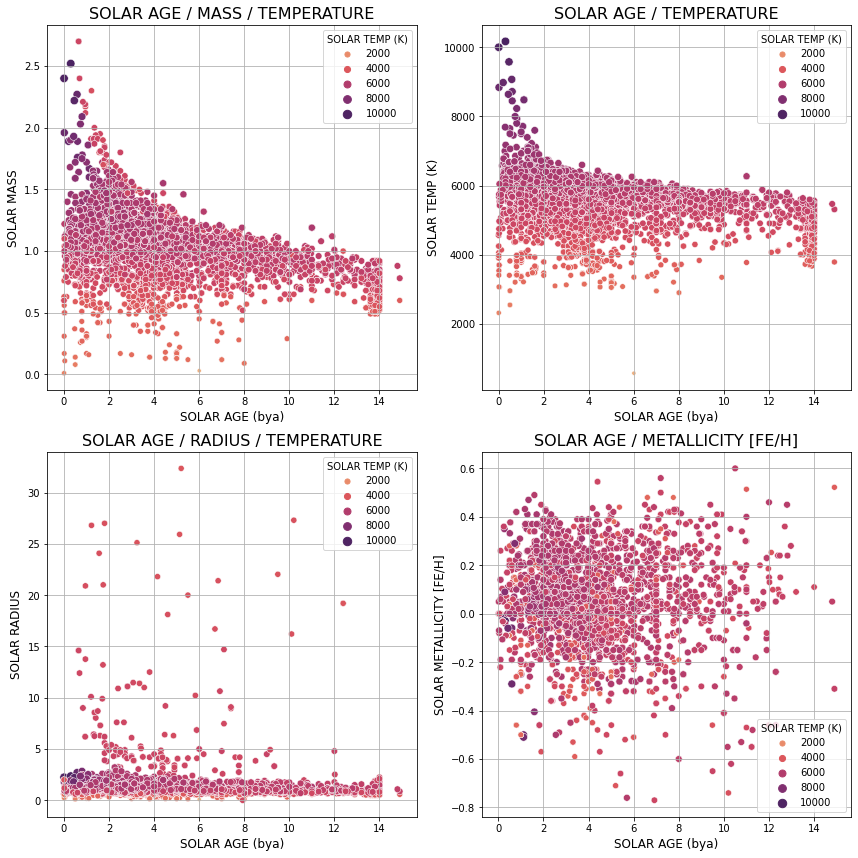

In [ ]:
# PLANETARY SYSTEMS - SOLAR RADIUS () / MASS () / TEMPERATURE (K)

plt.figure(figsize=(12,12))

plt.subplot(221)
sns.scatterplot(data=psystem_all, x='st_age', y='st_mass', hue='st_teff', size='st_teff', palette='flare')
plt.title('SOLAR AGE / MASS / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR MASS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(222)
sns.scatterplot(data=psystem_all, x='st_age', y='st_teff', hue='st_teff', size='st_teff', palette='flare')
plt.title('SOLAR AGE / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR TEMP (K)', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(223)
sns.scatterplot(data=psystem_all, x='st_age', y='st_rad', hue='st_teff', size='st_teff', palette='flare')
plt.title('SOLAR AGE / RADIUS / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR RADIUS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(224)
sns.scatterplot(data=psystem_all, x='st_age', y='st_met', hue='st_teff', size='st_teff', palette='flare')
plt.title('SOLAR AGE / METALLICITY [FE/H]', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR METALLICITY [FE/H]', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.show();

* Graphs above depict solar age relative to other critical measurables of stellar magnitude / activity:
  * Solar Age + Solar Radius
    * `st_age` + `st_radius`
  * Solar Age + Solar Mass
    * `st_age` + `st_mass`
  * Solar Age + Solar Temperature
    * `st_age` + `st_teff`

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


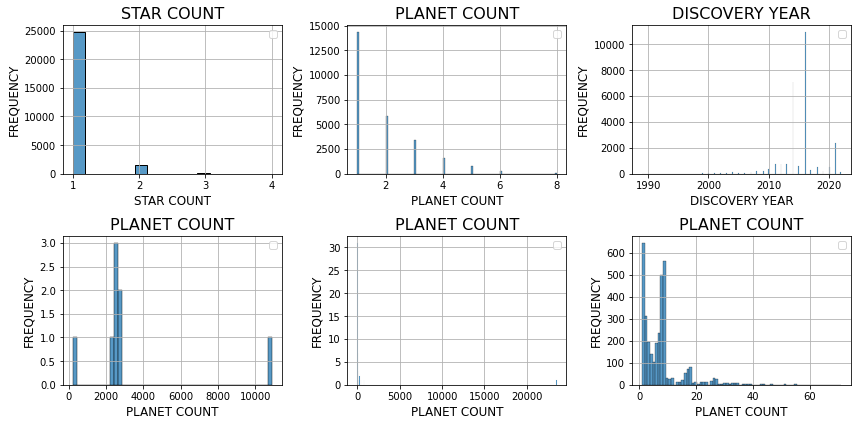

In [ ]:
# PLANETARY SYSTEMS - STAR / PLANET COUNT

 # 'pl_controv_flag', 'soltype',
 # 'discoverymethod', 'disc_year', 'disc_locale',
 # 'disc_facility', 'disc_telescope', 'disc_instrument'

plt.figure(figsize=(12,6))

plt.subplot(231)
sns.histplot(data=planetary_systems['sy_snum'], palette='mako')
plt.title('STAR COUNT', fontsize=16)
plt.xlabel('STAR COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.xticks(range(1,5,1))
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(232)
sns.histplot(data=planetary_systems['sy_pnum'], palette='mako')
plt.title('PLANET COUNT', fontsize=16)
plt.xlabel('PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(233)
sns.histplot(data=planetary_systems['disc_year'], palette='mako')
plt.title('DISCOVERY YEAR', fontsize=16)
plt.xlabel('DISCOVERY YEAR', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(234)
sns.histplot(data=planetary_systems['soltype'].value_counts(ascending=False), palette='mako') #.sort_values(ascending=False)
plt.title('PLANET COUNT', fontsize=16)
plt.xlabel('PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(235)
sns.histplot(data=planetary_systems['disc_telescope'].value_counts(ascending=False)[:50], palette='mako') #.sort_values(ascending=False)

plt.title('PLANET COUNT', fontsize=16)
plt.xlabel('PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(236)
sns.histplot(data=planetary_systems['hostname'].value_counts(ascending=False), palette='mako')
plt.title('PLANET COUNT', fontsize=16)
plt.xlabel('PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.x
plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.show()

## LOCATION

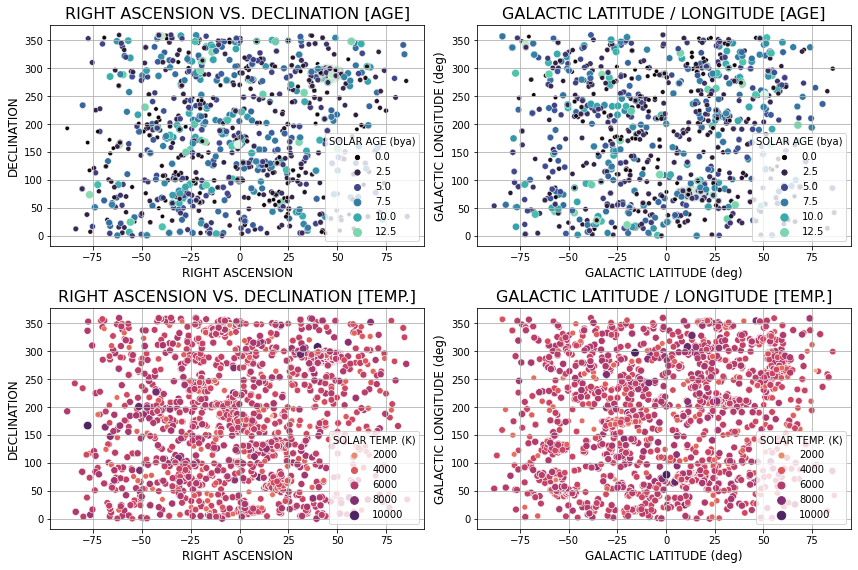

In [ ]:
# SOLAR RADIUS () / MASS () / TEMPERATURE (K)

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.scatterplot(data=psystem_all, x='dec', y='ra', hue='st_age', size='st_age', palette='mako')
plt.title('RIGHT ASCENSION VS. DECLINATION [AGE]', fontsize=16)
plt.xlabel('RIGHT ASCENSION', fontsize=12)
plt.ylabel('DECLINATION', fontsize=12)
plt.legend(loc='lower right', title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(222)
sns.scatterplot(data=psystem_all, x='glat', y='glon', hue='st_age', size='st_age', palette='mako')
plt.title('GALACTIC LATITUDE / LONGITUDE [AGE]', fontsize=16)
plt.xlabel('GALACTIC LATITUDE (deg)', fontsize=12)
plt.ylabel('GALACTIC LONGITUDE (deg)', fontsize=12)
plt.legend(loc='lower right', title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(223)
sns.scatterplot(data=psystem_all, x='dec', y='ra', hue='st_teff', size='st_teff', palette='flare')
plt.title('RIGHT ASCENSION VS. DECLINATION [TEMP.]', fontsize=16)
plt.xlabel('RIGHT ASCENSION', fontsize=12)
plt.ylabel('DECLINATION', fontsize=12)
plt.legend(loc='lower right', title='SOLAR TEMP. (K)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(224)
sns.scatterplot(data=psystem_all, x='glat', y='glon', hue='st_teff', size='st_teff', palette='flare')
plt.title('GALACTIC LATITUDE / LONGITUDE [TEMP.]', fontsize=16)
plt.xlabel('GALACTIC LATITUDE (deg)', fontsize=12)
plt.ylabel('GALACTIC LONGITUDE (deg)', fontsize=12)
plt.legend(loc='lower right', title='SOLAR TEMP. (K)')
plt.grid()
plt.tight_layout(pad=1)


plt.show()

* Graphs above depict two separate sets of 'mapping' or location metrics:
  * Declination + Right Ascension
    * `dec` + `ra`
  * Galactic Latitude + Galactic Longitude
    * `glat` + `glon`

* Few clear identifiable patterns or trends aside from observation clustering in a handful of cosmic 'regions'
* Universal chaos is readily apparent across the currently visible universe


## FIGURE DIRECTORY

In [ ]:
#import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
plt.savefig('Test.png', dpi=600)

# CLASSIFICATION MODEL

## CONFIGURATION / UTILITIES

In [ ]:
# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/homework/HW3'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2022/code/models/p2_shallow_learning/'

Mounted at /content/drive


In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p2_shallow_learning


## SPLITTING DATA

In [ ]:
target = 'soltype'

from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df, 
                                     train_size=0.6, 
                                     random_state=random_seed, 
                                     stratify=df[target])
# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test, 
                                   train_size=0.5, 
                                   random_state=random_seed, 
                                   stratify=df_test[target])

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,19397,41


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,41


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,41


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,41


## UNCOMMON FEATURES

In [ ]:
def common_var_checker(df_train, df_val, df_test, target):
  df_common_var = pd.DataFrame(np.intersect1d(np.intersect1d(df_train.columns, df_val.columns), np.union1d(df_test.columns, [target])),
                                 columns=['common var'])
  return df_common_var

df_common_var = common_var_checker(df_train, df_val, df_test, target)

In [ ]:
df_common_var

,common var
0,dec
1,default_flag
2,disc_facility
3,disc_instrument
4,disc_locale
5,disc_telescope
6,disc_year
7,discoverymethod
8,glat
9,glon


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


## IDENTIFIERS

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
def id_checker(df, dtype='float'):
    
    # Get the dataframe of identifiers
    df_id = df[[var for var in df.columns
                # If the data type is not dtype
                if (df[var].dtype != dtype
                    # If the value is unique for each sample
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
    
    return df_id

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()


,loc_rowid
0,29459
1,12179
2,25754
3,6259
4,5168


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,Kepler-905 b,Kepler-905,0,1,1,0,Transit,2016,Space,Kepler,...,4.50,1.6,290.051147,46.713408,14.80518,78.21427,529.268,14.058,12.264,13.9504
1,Kepler-1568 b,Kepler-1568,0,1,1,0,Transit,2016,Space,Kepler,...,4.28,NaN,289.182681,47.873330,15.80935,79.07172,916.313,14.138,12.618,13.9451
2,Kepler-616 b,Kepler-616,0,1,3,0,Transit,2016,Space,Kepler,...,4.47,NaN,294.989137,46.838306,11.81086,79.83355,945.775,15.021,13.448,14.9475
3,Kepler-11 c,Kepler-11,0,1,6,0,Transit,2010,Space,Kepler,...,NaN,NaN,297.115095,41.909109,8.13328,76.16130,646.346,13.817,12.180,13.7062
4,Kepler-1020 b,Kepler-1020,0,1,1,0,Transit,2016,Space,Kepler,...,4.63,0.7,292.672471,46.377278,13.02867,78.68313,415.358,14.211,12.150,13.9833


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,Kepler-1678 b,Kepler-1678,0,1,1,0,Transit,2020,Space,Kepler,...,4.61,NaN,292.591630,38.399563,9.51620,71.37765,847.339,15.020,13.371,14.9068
1,OGLE-2018-BLG-0532L b,OGLE-2018-BLG-0532L,1,1,1,0,Microlensing,2020,Ground,OGLE,...,NaN,NaN,269.983417,-28.997750,-2.72744,1.53870,773.000,NaN,NaN,NaN
2,Kepler-20 b,Kepler-20,0,2,6,0,Transit,2011,Space,Kepler,...,4.40,8.8,287.697991,42.338578,14.57345,73.37692,282.563,12.610,10.871,12.4535
3,Kepler-714 b,Kepler-714,0,1,1,0,Transit,2016,Space,Kepler,...,4.44,NaN,282.699469,43.272744,18.32302,72.84822,2083.370,15.430,13.825,15.2407
4,Kepler-1408 b,Kepler-1408,0,1,1,0,Transit,2016,Space,Kepler,...,3.99,NaN,282.699878,45.425788,19.05989,74.98391,535.048,12.124,10.694,11.9622


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,Kepler-583 b,Kepler-583,0,1,1,0,Transit,2016,Space,Kepler,...,4.36,NaN,282.111321,42.354551,18.40861,71.78308,867.2710,14.883,13.090,14.7985
1,HAT-P-39 b,HAT-P-39,1,2,1,0,Transit,2012,Ground,HATNet,...,NaN,NaN,113.758253,17.830028,17.44627,201.41730,697.0040,12.282,11.157,12.2269
2,OGLE-TR-10 b,OGLE-TR-10,0,1,1,0,Transit,2004,Ground,OGLE,...,4.40,NaN,267.867748,-29.876476,-1.57666,359.85149,1344.9700,16.006,12.856,15.6845
3,Kepler-1665 b,Kepler-1665,0,1,1,0,Transit,2020,Space,Kepler,...,3.98,NaN,290.396240,41.039923,12.20124,73.02343,335.5150,13.737,11.571,13.5913
4,K2-174 b,K2-174,0,1,1,0,Transit,2018,Space,K2,...,4.50,NaN,60.792973,16.347166,-26.34917,175.58217,99.9293,12.456,9.496,12.0082


In [ ]:
# also deleting names 

In [ ]:
df_test.drop(columns=['pl_name','hostname'], inplace=True)
df_train.drop(columns=['pl_name','hostname'], inplace=True)
df_val.drop(columns=['pl_name','hostname'], inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.50,1.6,290.051147,46.713408,14.80518,78.21427,529.268,14.058,12.264,13.9504
1,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.28,NaN,289.182681,47.873330,15.80935,79.07172,916.313,14.138,12.618,13.9451
2,0,1,3,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.47,NaN,294.989137,46.838306,11.81086,79.83355,945.775,15.021,13.448,14.9475
3,0,1,6,0,Transit,2010,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,NaN,NaN,297.115095,41.909109,8.13328,76.16130,646.346,13.817,12.180,13.7062
4,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.63,0.7,292.672471,46.377278,13.02867,78.68313,415.358,14.211,12.150,13.9833


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.36,NaN,282.111321,42.354551,18.40861,71.78308,867.2710,14.883,13.090,14.7985
1,1,2,1,0,Transit,2012,Ground,HATNet,Canon 200mm f/1.8L,2K CCD Sensor,...,NaN,NaN,113.758253,17.830028,17.44627,201.41730,697.0040,12.282,11.157,12.2269
2,0,1,1,0,Transit,2004,Ground,OGLE,1.3 m Warsaw University Telescope,OGLE CCD Array,...,4.40,NaN,267.867748,-29.876476,-1.57666,359.85149,1344.9700,16.006,12.856,15.6845
3,0,1,1,0,Transit,2020,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,3.98,NaN,290.396240,41.039923,12.20124,73.02343,335.5150,13.737,11.571,13.5913
4,0,1,1,0,Transit,2018,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,...,4.50,NaN,60.792973,16.347166,-26.34917,175.58217,99.9293,12.456,9.496,12.0082


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,default_flag,sy_snum,sy_pnum,pl_controv_flag,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,...,st_logg,st_age,ra,dec,glat,glon,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,0,1,1,0,Transit,2020,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.61,NaN,292.591630,38.399563,9.51620,71.37765,847.339,15.020,13.371,14.9068
1,1,1,1,0,Microlensing,2020,Ground,OGLE,1.3 m Warsaw University Telescope,OGLE CCD Array,...,NaN,NaN,269.983417,-28.997750,-2.72744,1.53870,773.000,NaN,NaN,NaN
2,0,2,6,0,Transit,2011,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.40,8.8,287.697991,42.338578,14.57345,73.37692,282.563,12.610,10.871,12.4535
3,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,4.44,NaN,282.699469,43.272744,18.32302,72.84822,2083.370,15.430,13.825,15.2407
4,0,1,1,0,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,...,3.99,NaN,282.699878,45.425788,19.05989,74.98391,535.048,12.124,10.694,11.9622


## DATETIME VARIABLES

## MISSING DATA

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : the dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and data type
    """
    
    # Get the dataframe of variables with NaN, their proportion of NaN and data type
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,st_spectype,0.945065,object
1,pl_bmassj,0.856043,float64
2,pl_bmasse,0.856012,float64
3,st_age,0.798138,float64
4,st_lum,0.742429,float64
5,pl_radj,0.701104,float64
6,pl_insol,0.576170,float64
7,pl_eqt,0.544774,float64
8,pl_orbincl,0.525596,float64
9,pl_orbeccen,0.486127,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object
1,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,pl_bmassj,0.856043,float64
1,pl_bmasse,0.856012,float64
2,st_age,0.798138,float64
3,st_lum,0.742429,float64
4,pl_radj,0.701104,float64
5,pl_insol,0.576170,float64
6,pl_eqt,0.544774,float64
7,pl_orbincl,0.525596,float64
8,pl_orbeccen,0.486127,float64
9,pl_orbsmax,0.438863,float64


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,19397,38


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,38


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,38


In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
df['st_spectype'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6461    NaN
6462    NaN
6463    NaN
6464    NaN
6465    NaN
Name: st_spectype, Length: 32329, dtype: object>

In [ ]:
df_train.isnull().sum()

In [ ]:
# DROP st_spectype, too many Nan

In [ ]:
df_test.drop(columns='st_spectype', axis=1, inplace=True)

In [ ]:
df_train.drop(columns='st_spectype', axis=1, inplace=True)

In [ ]:
df_val.drop(columns='st_spectype', axis=1, inplace=True)

## ENCODING DATA

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,object
2,float64


In [ ]:
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,disc_instrument,88
1,disc_telescope,75
2,disc_facility,64
3,discoverymethod,11
4,soltype,9
5,disc_locale,4


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,default_flag,sy_snum,sy_pnum,pl_controv_flag,disc_year,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,discoverymethod_Disk Kinematics,discoverymethod_Eclipse Timing Variations,discoverymethod_Imaging,discoverymethod_Microlensing,discoverymethod_Orbital Brightness Modulation,discoverymethod_Pulsar Timing,discoverymethod_Pulsation Timing Variations,discoverymethod_Radial Velocity,discoverymethod_Transit,discoverymethod_Transit Timing Variations
0,0,1,1,0,2016,Kepler Project Candidate (q1_q8_koi),5.082709,0.0580,1.600,0.136,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,2016,Kepler Project Candidate (q1_q16_koi),20.925392,0.1499,1.380,0.136,...,0,0,0,0,0,0,0,0,1,0
2,0,1,3,0,2016,Published Confirmed,9.997457,0.0440,2.800,0.136,...,0,0,0,0,0,0,0,0,1,0
3,0,1,6,0,2010,Published Confirmed,4.437963,0.0440,3.024,0.270,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,2016,Kepler Project Candidate (q1_q8_koi),96.914920,0.3890,2.300,0.136,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df['soltype'].unique()

array(['Kepler Project Candidate (q1_q8_koi)',
       'Kepler Project Candidate (q1_q16_koi)', 'Published Confirmed',
       'Kepler Project Candidate (q1_q17_dr25_koi)',
       'Published Candidate', 'Kepler Project Candidate (q1_q12_koi)',
       'Kepler Project Candidate (q1_q17_dr24_koi)',
       'Kepler Project Candidate (q1_q17_dr25_sup_koi)',
       'TESS Project Candidate'], dtype=object)

In [ ]:
df['soltype'] = df['soltype'].apply(lambda x: 1 if x == 'Published Confirmed' else 0)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

,default_flag,sy_snum,sy_pnum,pl_controv_flag,disc_year,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,...,discoverymethod_Disk Kinematics,discoverymethod_Eclipse Timing Variations,discoverymethod_Imaging,discoverymethod_Microlensing,discoverymethod_Orbital Brightness Modulation,discoverymethod_Pulsar Timing,discoverymethod_Pulsation Timing Variations,discoverymethod_Radial Velocity,discoverymethod_Transit,discoverymethod_Transit Timing Variations
0,0,1,1,0,2016,0,5.082709,0.0580,1.600,0.136,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,2016,0,20.925392,0.1499,1.380,0.136,...,0,0,0,0,0,0,0,0,1,0
2,0,1,3,0,2016,1,9.997457,0.0440,2.800,0.136,...,0,0,0,0,0,0,0,0,1,0
3,0,1,6,0,2010,1,4.437963,0.0440,3.024,0.270,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,2016,0,96.914920,0.3890,2.300,0.136,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,19397,274


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6466,274


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,6466,274


## SPLITTING FEATURE / TARGET

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## SCALING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

## HYPERPARAMETER TUNING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
from sklearn.model_selection import PredefinedSplit

def get_train_val_ps(X_train, y_train, X_val, y_val):
    """
    Get the:
    feature matrix and target velctor in the combined training and validation data
    target vector in the combined training and validation data
    PredefinedSplit
    
    Parameters
    ----------
    X_train : the feature matrix in the training data
    y_train : the target vector in the training data
    X_val : the feature matrix in the validation data
    y_val : the target vector in the validation data  

    Return
    ----------
    The feature matrix in the combined training and validation data
    The target vector in the combined training and validation data
    PredefinedSplit
    """  

    # Combine the feature matrix in the training and validation data
    X_train_val = np.vstack((X_train, X_val))

    # Combine the target vector in the training and validation data
    y_train_val = np.vstack((y_train.reshape(-1, 1), y_val.reshape(-1, 1))).reshape(-1)

    # Get the indices of training and validation data
    train_val_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_val.shape[0], 0))

    # The PredefinedSplit
    ps = PredefinedSplit(train_val_idxs)

    return X_train_val, y_train_val, ps

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

### GRIDSEARCH

In [ ]:
param_grids = {}


In [ ]:
#The parameter grid for random forest
#The hyperparameters we want to fine-tune are:

#min_samples_split
#min_samples_leaf
#See details of the meaning of the hyperparametes in sklearn.ensemble.RandomForestClassifier

# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100, 200]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
#The parameter grid for LogisticRegression
#The hyperparameters we want to fine-tune are:
#tol
#C
#See details of the meaning of the hyperparametes in sklearn.linear_model.LogisticRegression
# The parameter grid of tol
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -8] # more ranges + play with powers

# The parameter grid of C
C_grid = [10 ** -5, 10 ** -4, 10 ** -3]
# [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
# Make directory
import os
#directory = os.path.dirname('/content/drive/My Drive/Colab Notebooks/result/cv_results/GridSearchCV3/result/Project/')
directory = os.path.dirname(abspath + 'result/cv_results/GridSearchCV3/result/Project/')
if not os.path.exists(directory):
    os.makedirs(directory)

### HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='/content/drive/My Drive/Colab Notebooks/result/cv_results/GridSearchCV3/result/submission/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.913253,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."
1,0.785373,"{'model__C': 0.001, 'model__tol': 1e-05}","(LogisticRegression(C=0.001, class_weight='bal..."


## MODEL SELECTION

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

## GENERATE SUBMISSION FILE

### CREATE DIRECTORY

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

### GENERATE SUBMISSION FILE

In [ ]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((np.arange(1, y_test_pred.shape[0] + 1).reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target]).astype({'id':int, target:int})                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)                                                                              